In [4]:
import numpy as np
import matplotlib.pyplot as plt

Ejercicio 1

In [5]:
def for_dif(u,h):
    du = np.zeros(len(u))
    for i in range(len(u)-1):
        du[i] = (u[i+1] - u[i])/h
    du[-1] = du[-2]
    return du

def back_dif(u,h):
    du = np.zeros(len(u))
    for i in range(1,len(u)):
        du[i] = (u[i] - u[i-1])/h
    du[0] = du[1]
    return du

def center_dif(u,h):
    du = np.zeros(len(u))
    for i in range(1,len(u)-1):
        du[i] = (u[i+1] - u[i-1])/(2*h)
    du[0] = du[1]
    du[-1] = du[-2]
    return du


In [6]:
def f(x):
    return x**2

X = np.linspace(0,1,1000)
u = [f(x) for x in X]

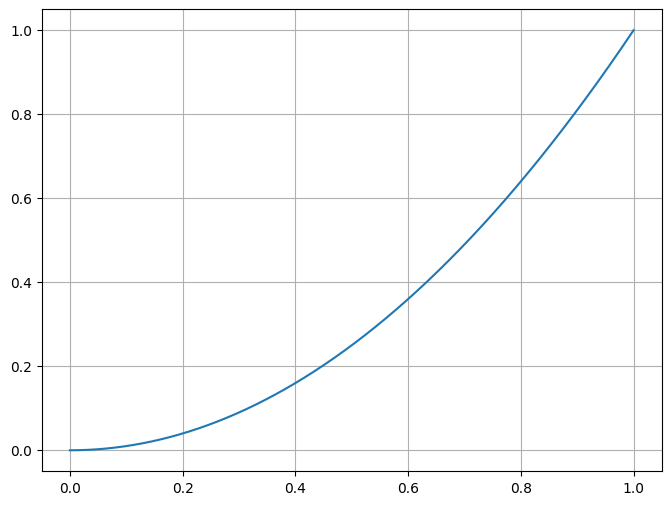

In [7]:
plt.figure(figsize=(8,6))
plt.grid()
plt.plot(X,u)

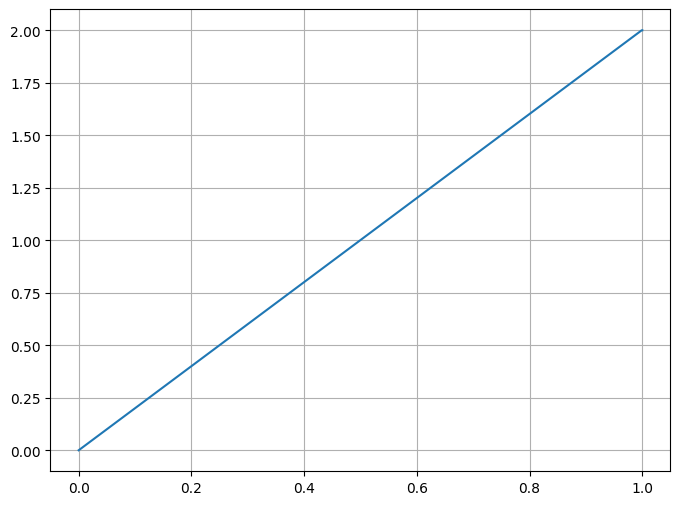

In [8]:
h = (X[-1]-X[0])/len(X)
du = for_dif(u,h)
plt.figure(figsize=(8,6))
plt.grid()
plt.plot(X,du)

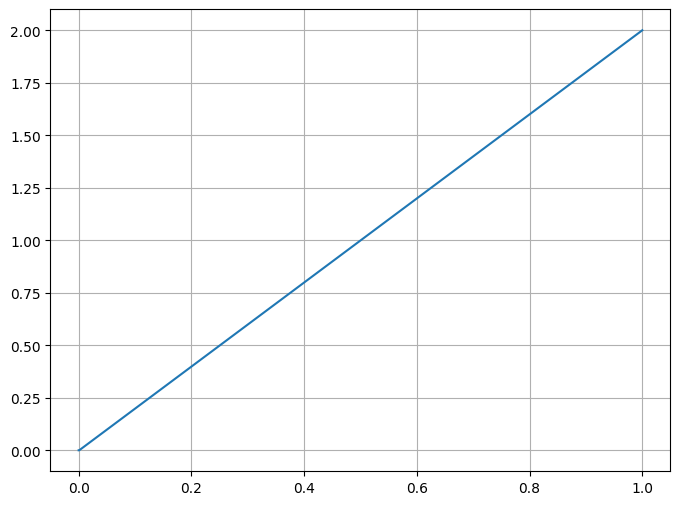

In [9]:
h = (X[-1]-X[0])/len(X)
du = back_dif(u,h)
plt.figure(figsize=(8,6))
plt.grid()
plt.plot(X,du)

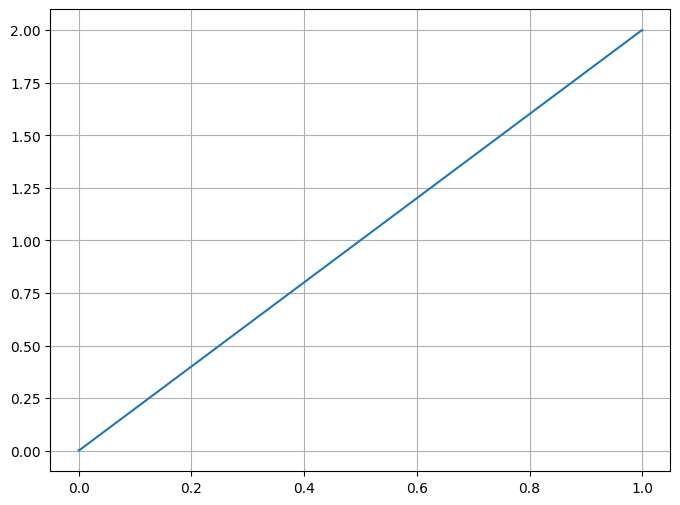

In [10]:
h = (X[-1]-X[0])/len(X)
du = center_dif(u, h)
plt.figure(figsize=(8,6))
plt.grid()
plt.plot(X,du)

Ejercicio 3

In [11]:
def poisson(f,alpha,beta,m):
    
    h = 1/(m+1)
    x = np.linspace(h, 1-h, m)
    
    b = [f(i) for i in x]
    b[0] -= alpha/h**2
    b[-1] -= beta/h**2
    
    diag_sup_inf = [1/h**2]*(m-1)
    diag = [-2/h**2]*m
    
    A = np.diag(diag) + np.diag(diag_sup_inf,-1) + np.diag(diag_sup_inf,1)
    
    u = np.linalg.solve(A,b)
    u = np.concat(([alpha],u,[beta]))
    x = np.concat(([0],x,[1]))
    
    return x, u

In [12]:
def f(x):
  return -(np.pi**2/4)*np.cos(np.pi*x/2)

In [13]:
x,u = poisson(f,1,0,1000)

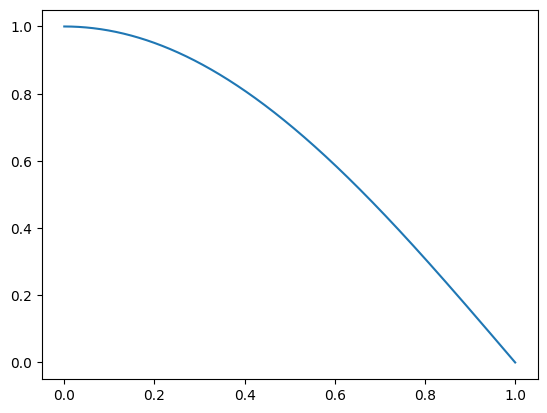

In [14]:
plt.plot(x,u)

Ejercicio 4

In [15]:
def poisson2(f,m):
    
    h = 1/(m+1)
    x = np.linspace(h, 1-h, m)
    
    b = [f(i) for i in x]
    
    diag_sup_inf = [1/h**2]*(m-1)
    diag = [-1/h**2]+[-2/h**2]*(m-1)
    
    A = np.diag(diag) + np.diag(diag_sup_inf,-1) + np.diag(diag_sup_inf,1)
    
    u = np.linalg.solve(A,b)
    u = np.concat(([u[0]],u,[0]))
    x = np.concat(([0],x,[1]))
    
    return x, u

In [16]:
x,u = poisson2(f,100)

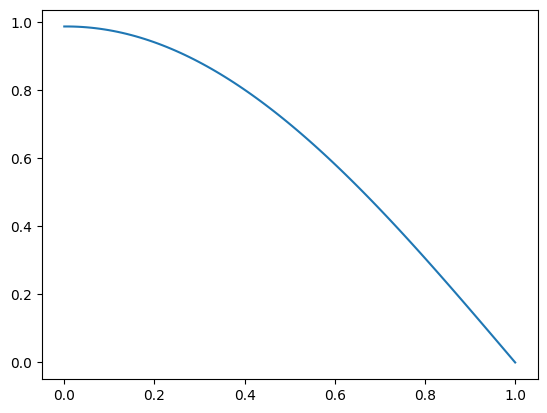

In [17]:
plt.plot(x,u)

In [18]:
def poisson3(f,m):
    
    h = 1/(m+1)
    x = np.linspace(h, 1-h, m)
    
    b = [f(i) for i in x]
    
    diag_sup_inf = [1/h**2]*(m-1)
    diag = [-2/h**2]*m
    
    A = np.diag(diag) + np.diag(diag_sup_inf,-1) + np.diag([2/h**2]+diag_sup_inf[:-1],1)
    
    u = np.linalg.solve(A,b)
    u = np.concat(([u[1]],u,[0]))
    x = np.concat(([0],x,[1]))
    
    return x, u

In [19]:
x,u = poisson3(f,100)

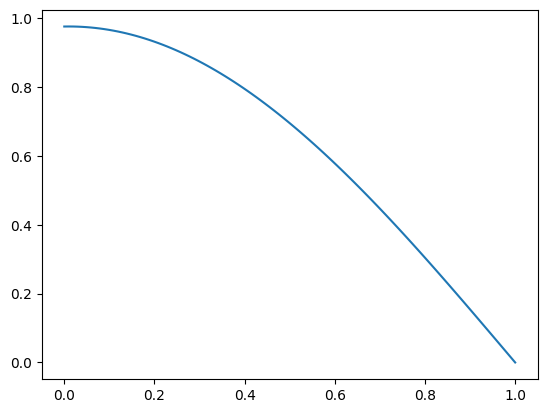

In [20]:
plt.plot(x,u)

Ejercicio 5

In [21]:
def calor(T, m, n, u0):
    dx = 2/(m-1)
    dt = T/(n-1)
    
    x = np.linspace(-1, 1, m)
    t = np.linspace(0, T, n)
    
    U = np.zeros((m, n))
    U[:, 0] = [u0(i) for i in x] # u(x,0) = u0(x)
    U[0, 0] = 0 # u(-1,t) = 0
    U[-1, 0] = 0 # u(1,t) = 0
    
    diag = [1-2*dt/(dx**2)]*m
    diag_sup_inf = [dt/(dx**2)]*(m-1)
    
    A = np.diag(diag) + np.diag(diag_sup_inf,1) + np.diag(diag_sup_inf,-1)
    
    for j in range(1,n):
        U[:, j] = A @ U[:,j-1]
        U[0, j] = 0
        U[-1, j] = 0
        
    return x, t, U

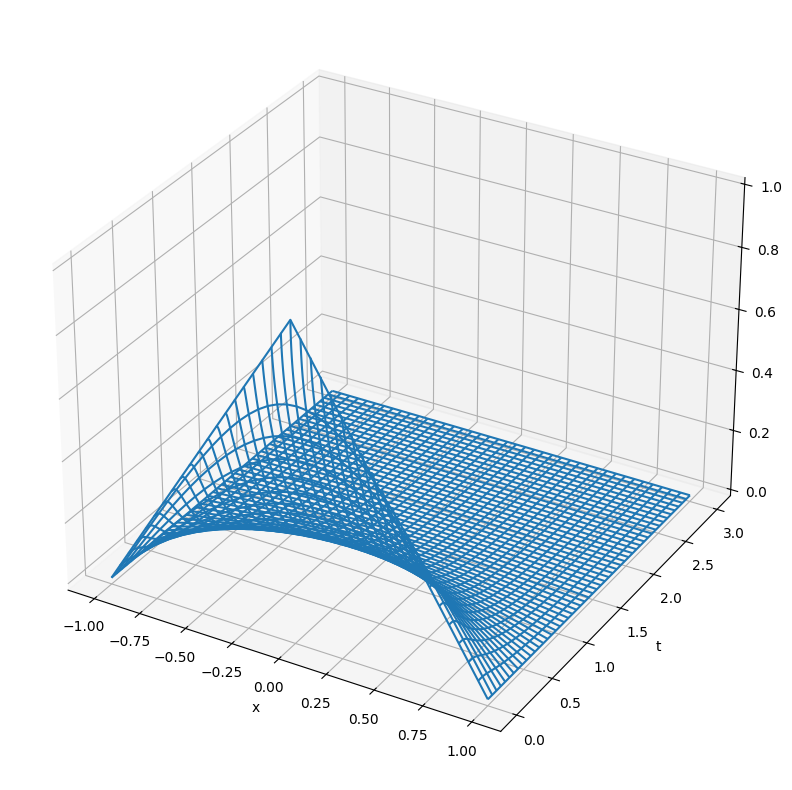

In [22]:
def u0(x):
    if x<0:
        return x+1
    else:
        return 1-x
    
x, t, U = calor(3, 41, 3000, u0)

Tspan, Xspan = np.meshgrid(t, x)

plt.figure(figsize=(15,10))
ax = plt.axes(projection ='3d')
ax.plot_wireframe(Xspan, Tspan, U)
plt.xlabel("x")
plt.ylabel("t")

plt.show()

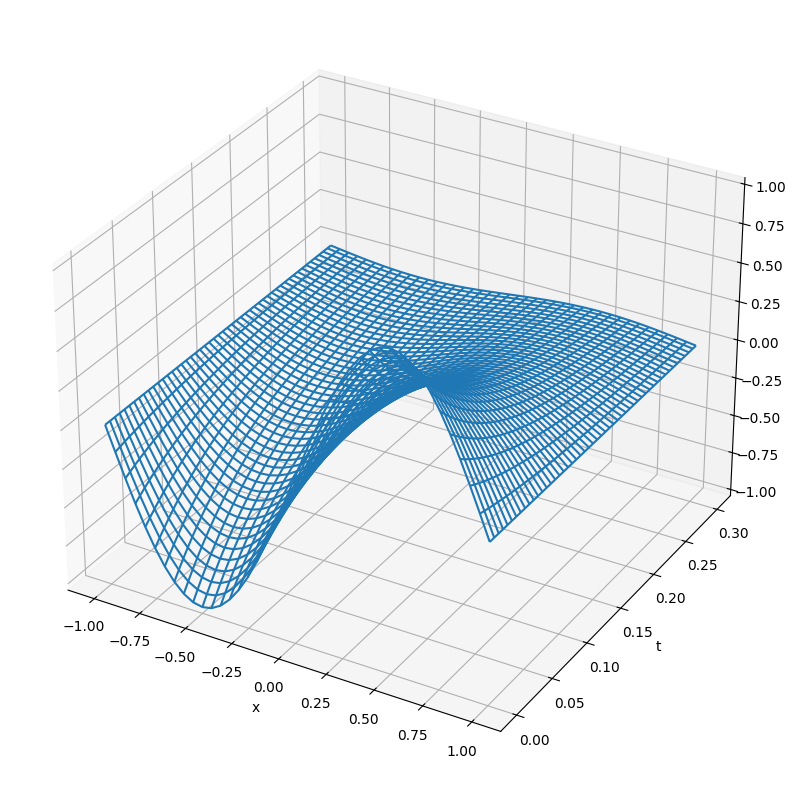

In [23]:
def u0(x):
    return np.sin(np.pi*x)
    
x, t, U = calor(0.3, 41, 300, u0)

Tspan, Xspan = np.meshgrid(t, x)

plt.figure(figsize=(15,10))
ax = plt.axes(projection ='3d')
ax.plot_wireframe(Xspan, Tspan, U)
plt.xlabel("x")
plt.ylabel("t")

plt.show()

Ejercicio 6

In [24]:
def calor2(T, m, n, u0, f):
    dx = 2/(m-1)
    dt = T/(n-1)

    x = np.linspace(-1, 1, m)
    t = np.linspace(0, T, n)    
    
    U = np.zeros((m, n))
    U[:, 0] = [u0(i) for i in x] # u(x,0) = u0(x)
    U[0, 0] = 0 # u(-1,t) = 0
    U[-1, 0] = 0 # u(1,t) = 0
    
    F = np.array([np.array([f(x[i], t[j]) for j in range(len(t))]) for i in range(len(x))])
    
    diag = [1-2*dt/(dx**2)]*m
    diag_sup_inf = [dt/(dx**2)]*(m-1)

    A = np.diag(diag) + np.diag(diag_sup_inf,1) + np.diag(diag_sup_inf,-1)

    B = np.zeros((m,2*m))

    for i in range(len(A)):
        B[i] = np.concat((A[i], np.diag([dt]*len(A[i]))[i]))
    
    for j in range(1,n):
        U[:, j] = B @ np.concatenate((U[:,j-1], F[:,j-1])) 
        U[0, j] = 0
        U[-1, j] = 0
        
    return x, t, U, F

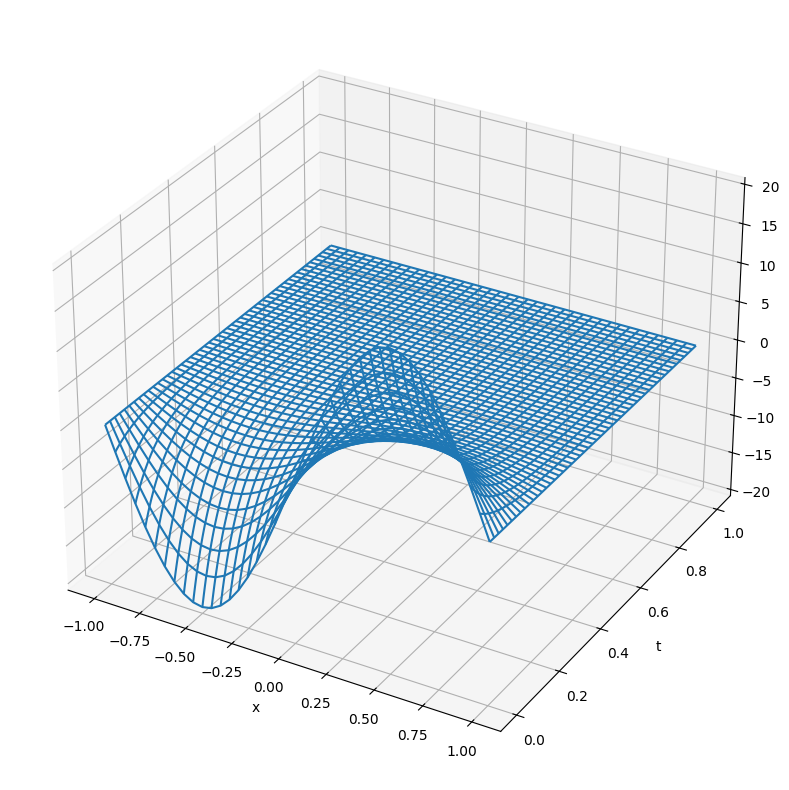

In [36]:
def u0(x):
    return 20*np.sin(np.pi*x)

def f(x, t):
    return np.exp(-7*t**2)*abs(x)
    
x, t, U, F = calor2(1, 41, 20000, u0, f)

Tspan, Xspan = np.meshgrid(t, x)

plt.figure(figsize=(15,10))
ax = plt.axes(projection ='3d')
ax.plot_wireframe(Xspan, Tspan, U)
plt.xlabel("x")
plt.ylabel("t")

plt.show()

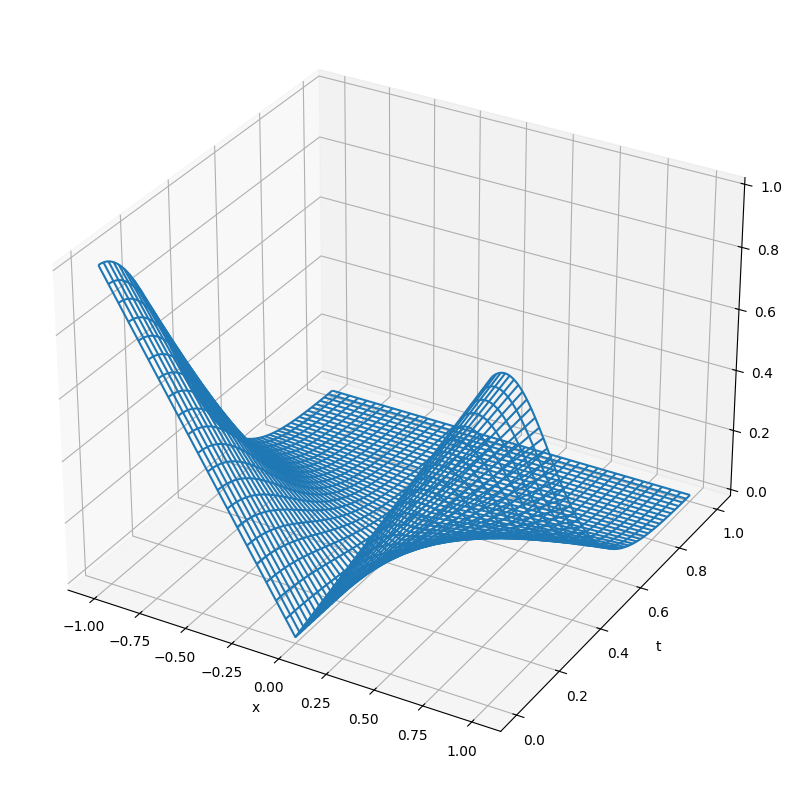

In [37]:
plt.figure(figsize=(15,10))
ax = plt.axes(projection ='3d')
ax.plot_wireframe(Xspan, Tspan, F)
plt.xlabel("x")
plt.ylabel("t")

plt.show()

Ejercicio 8

In [27]:
def calor_2dim(T, m, l, n, a, b, c, d, alpha, f):
    dx = (b-a)/(m-1)
    dy = (d-c)/(l-1)
    dt = 1/(n-1)
    
    x = np.linspace(a, b, m)
    y = np.linspace(c, d, l)
    t = np.linspace(0, T, n)

    U = np.zeros((m, l, n))
    
    F = np.array([np.array([np.array([f(j,i,k) for k in t]) for i in y]) for j in x])
    
    c1 = alpha*dt/dx**2
    c2 = alpha*dt/dy**2
    
    for k in range(1,n):
        for j in range(1,m-1):
            for i in range(1,l-1):
                U[j,i,k] = c1*(U[j+1,i,k-1]-2*U[j,i,k-1]+U[j-1,i,k]) + c2*(U[j,i+1,k-1]-2*U[j,i,k-1]+U[j,i-1,k]) + dt*F[j,i,k-1]
    # no pongo condiciones donde j e i sean 0 o -1 porque directamente me pide igual a cero y ya cree asi la matriz
    
    return x, y, t, U           

In [28]:
def f(x,y,t):
    return (x**3+y**4)*np.sin(t)

In [29]:
x, y, t, U = calor_2dim(1, 50, 50, 5000, -1, 1, -1, 1, 1, f)

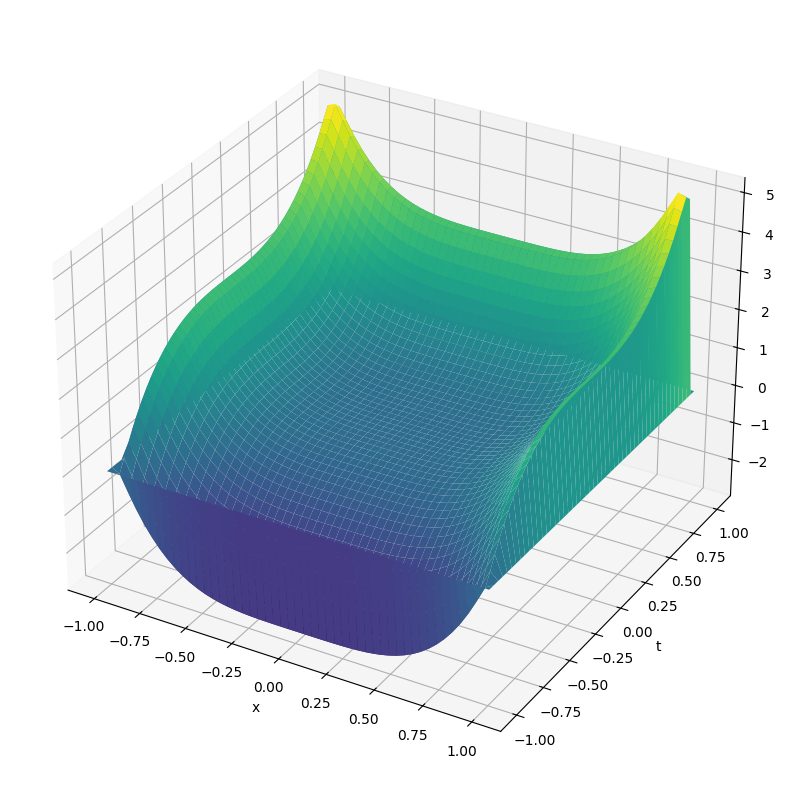

In [35]:
from matplotlib import cm

Xspan, Yspan = np.meshgrid(x, y)

plt.figure(figsize=(15,10))
ax = plt.axes(projection ='3d')
ax.plot_surface(Xspan, Yspan, U[:,:,900], cmap = cm.viridis)
plt.xlabel("x")
plt.ylabel("t")

plt.show()

Ejercicio 9

Voy a armar un sistema de ecuaciones para cada $x_{i}$, despues le aplico ode int y lo meto todo en un vector. Facil no?

In [38]:
def lineas(T, m, n, a, b, alpha, g):
    dx = 2/(m-1)
    dt = T/(n-1)

    x = np.linspace(-1, 1, m)
    t = np.linspace(0, T, n)   